In [1]:
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
from math import sin, cos, sqrt, atan2, radians

import shapely
import pickle
import random
import numpy as np
import gmaps, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from ipywidgets.embed import embed_minimal_html
import webbrowser
# The functions of Geoguessr class are loaded 
# from the geoLSTM.py file
import geoLSTM

2021-07-18 20:52:09.010813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-18 20:52:09.010908: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# directory containing data, train test file split
DATADIR = "../data extract/data"
# directory containing combined location data folders
DATACOMBINED = DATADIR + "/data combined/"
# directory containing polygon gird shapes
POLYDIR = "../data extract" 
# directory to store/load model in/from
MODELDIR = "models"

# Directory structure to use on Colab
# UNCOMMENT FOR COLAB:

# !pip install gmaps
# DATADIR = '/content/drive/MyDrive/location-guesser'
# POLYDIR = '/content/drive/MyDrive/location-guesser'
# DATACOMBINED = DATADIR + "/data combined/"
# MODELDIR = '/content/drive/MyDrive/location-guesser/ML/models'
# import sys
# sys.path.append('/content/drive/MyDrive/location-guesser/ML')
# import geoLSTM

In [3]:
# load training image file names
TF = np.load(DATADIR + '/train.npy')
# load testing image file names
TESF = np.load(DATADIR +'/test.npy')
print("Train files: {}, Test files: {}".format(len(TF), len(TESF)))

Train files: 7, Test files: 1


93


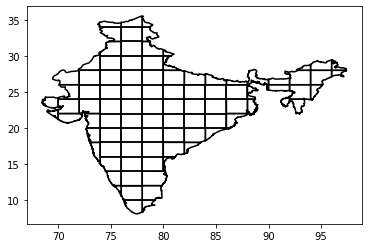

In [4]:
# load split grid file
indPolyGrid = pickle.load(open(POLYDIR + "/indPolyGrid.pkl",'rb'))
for i in indPolyGrid.values():
    plt.plot(i[:,1],i[:,0], color='black')
print(len(indPolyGrid))

In [5]:
geo_model = geoLSTM.Geoguessr(useRestnet=False)

2021-07-18 20:52:11.905362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-18 20:52:11.905597: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-18 20:52:11.905690: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-ESSUPEF6): /proc/driver/nvidia/version does not exist
2021-07-18 20:52:11.906388: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 3, 512)            2994048   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                147712    
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Getting data from directory: ../data extract/data/data combined/
Read 2 points. Training now


2021-07-18 20:52:16.588593: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-18 20:52:16.589494: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2496000000 Hz


Epoch 1/2


2021-07-18 20:52:18.438418: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 276480000 exceeds 10% of free system memory.
2021-07-18 20:52:18.438553: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 276480000 exceeds 10% of free system memory.
2021-07-18 20:52:19.304588: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 276480000 exceeds 10% of free system memory.
2021-07-18 20:52:19.329341: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 276480000 exceeds 10% of free system memory.
2021-07-18 20:52:21.491134: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 276480000 exceeds 10% of free system memory.


2/2 [==============================] - 29s 12s/step - loss: 5.6772 - categorical_accuracy: 0.0000e+00
Epoch 2/2
2/2 [==============================] - 26s 14s/step - loss: 5.6985 - categorical_accuracy: 0.0000e+00
Training sucessfull!!

Saving model 0 with loss 5.699 at models
Read 2 points. Training now
Epoch 1/2
2/2 [==============================] - 26s 13s/step - loss: 5.8208 - categorical_accuracy: 0.0000e+00
Epoch 2/2
2/2 [==============================] - 27s 14s/step - loss: 5.9159 - categorical_accuracy: 0.0000e+00
Training sucessfull!!

Saving model 1 with loss 5.916 at models
Read 2 points. Training now
Epoch 1/2
2/2 [==============================] - 26s 13s/step - loss: 5.3096 - categorical_accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 26s 13s/step - loss: 5.0186 - categorical_accuracy: 0.5000
Training sucessfull!!

Saving model 2 with loss 5.019 at models
Read 1 points. Training now
Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 

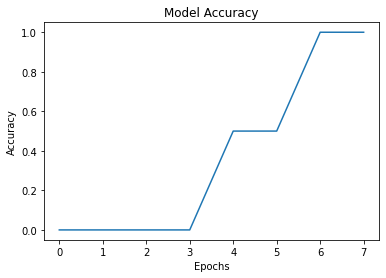

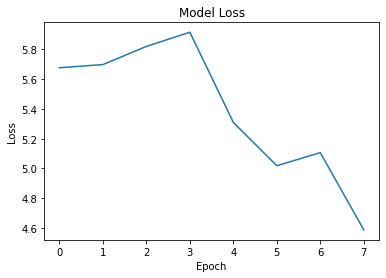

In [6]:
geo_model.fit(TF, DATACOMBINED, 
      saveFolder=MODELDIR, 
      batchSize=2, 
      epochs=2,  
      plot=True)

In [13]:
# modelName = '/restnet_5.738_19.h5'
model_name = '/model_5.916_1.h5'
geo_model = geoLSTM.Geoguessr.load(MODELDIR + model_name)

Loading model from models/model_5.916_1.h5
Loaded model loss 5.916
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 3, 512)            2994048   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                147712    
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_____________________________________________________

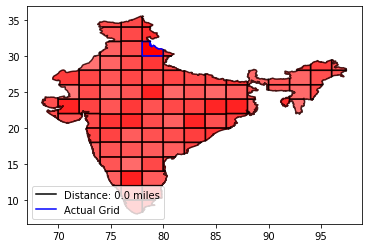

0.0

In [22]:
geo_model.predictSingle(TESF[0], DATACOMBINED, ployGrid=indPolyGrid)

In [15]:
geo_model.evaluate(TESF, DATACOMBINED, indPolyGrid)

Evaluated 0 out of 1 points


0.0

In [16]:
models = []
for i in os.listdir(MODELDIR):
    models.append(geoLSTM.Geoguessr.load(MODELDIR + '/' +i))

Loading model from models/model_4.587_3.h5
Loaded model loss 4.587
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 3, 512)            2994048   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                147712    
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_____________________________________________________

In [19]:
trainableParams = []
avgDistanceError = []
for gm in models:
    trainableParams.append(sum([tf.keras.backend.count_params(i) for i in gm.model.trainable_weights]))
    avgDistanceError.append(gm.evaluate(TESF, DATACOMBINED, indPolyGrid))

Evaluated 0 out of 1 points
Evaluated 0 out of 1 points
Evaluated 0 out of 1 points
Evaluated 0 out of 1 points


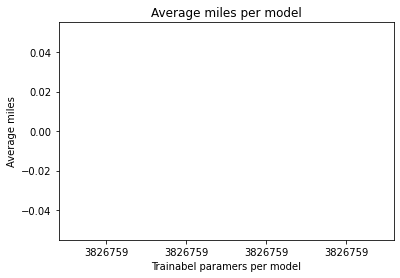

In [20]:
plt.bar(np.arange(len(trainableParams)), height=avgDistanceError)
plt.xticks(np.arange(len(trainableParams)), trainableParams)
plt.xlabel("Trainabel paramers per model")
plt.ylabel("Average miles")
plt.title("Average miles per model")
plt.show()